## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.cluster import KMeans
import pylab as pl


## General Settings

In [2]:
# Ensure pandas shows all columns in dataframe
pd.set_option('display.max_columns', None)
#Set default decimal point to not be scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Import Dataset

In [3]:
# Define the path
path = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/02 Data/Cleaned Data/'
# Join the path and filename
file_path0 = os.path.join(path, 'listing_cleaned2.csv')
df_listing = pd.read_csv(file_path0)

## Begin Kmeans Analysis

In [4]:
#Using 2 variables price and minimum_nights

In [5]:
# Create a new DataFrame with the price and min nights columns
df_num = df_listing[['price', 'minimum_nights']]


In [11]:
num_cl = range(1,8) #define the range of potential clusters in data
kmeans = [KMeans(n_clusters=i) for i in num_cl] #define kmeans cluster in range above

In [12]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [13]:
score

[-145453053.10809523,
 -87188707.80731285,
 -54799647.307301536,
 -38495089.16009197,
 -26544182.785370026,
 -19803371.71978607,
 -16094584.883666135]

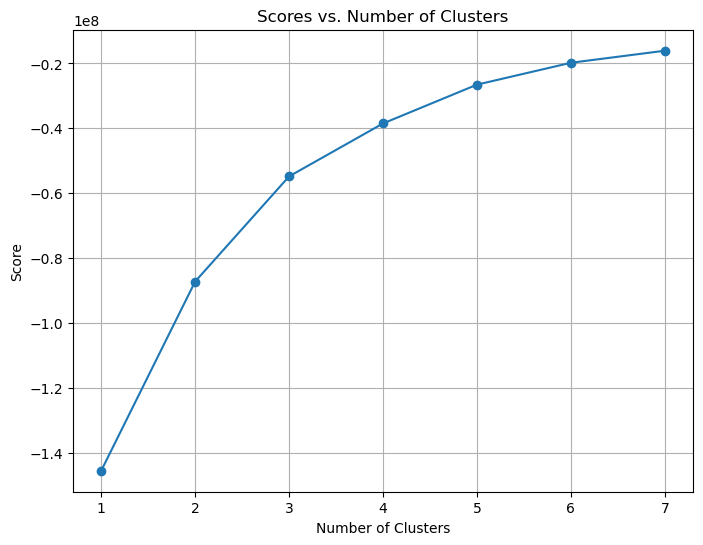

In [14]:
# Plot the scores vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_cl, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Scores vs. Number of Clusters')
plt.grid(True)

In [15]:
#Create the k-means object
kmeans = KMeans(n_clusters=5)
#Fit the k-means object to the data
kmeans.fit(df_num)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [18]:
df_num['clusters'] = kmeans.fit_predict(df_num)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/x_/m3qpx6cn2g1bs3lx_zk503600000gn/T/ipykernel_52476/1773540400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [19]:
df_num.head()

,price,minimum_nights,clusters
0,83,63,3
1,180,6,1
2,70,150,3
3,90,93,3
4,25,92,3


In [20]:
df_num['clusters'].value_counts()

clusters
0    4661
3    1972
1    1611
2     146
4      10
Name: count, dtype: int64

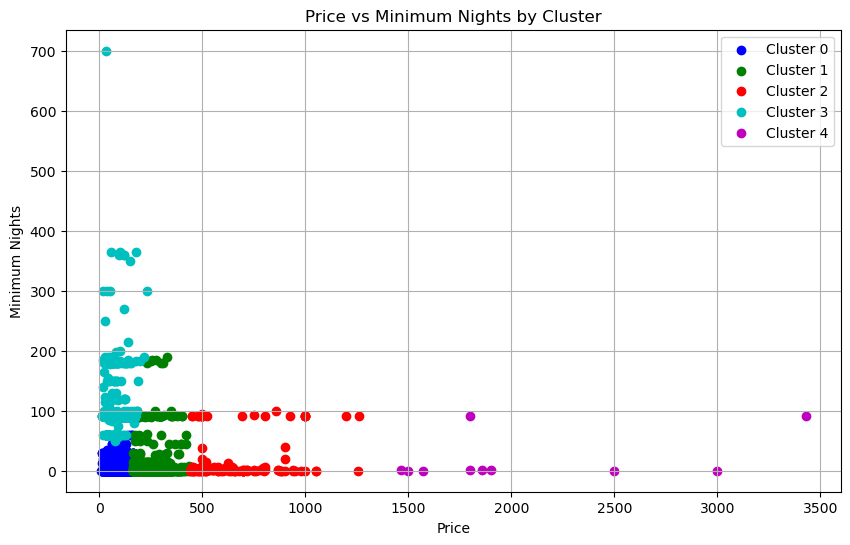

In [21]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # Define colors for each cluster
for cluster in range(5):
    cluster_data = df_num[df_num['clusters'] == cluster]
    plt.scatter(cluster_data['price'], cluster_data['minimum_nights'], c=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.title('Price vs Minimum Nights by Cluster')
plt.legend()
plt.grid(True)

In [22]:
# Group the data by 'clusters' and calculate descriptive statistics
cluster_stats = df_num.groupby('clusters').describe()

In [23]:
cluster_stats

price                                   minimum_nights               \
         count mean std  min  25%  50%  75%  max          count mean std min   
clusters                                                                       
0         4661   93  35    9   67   90  120  165           4661    4   6   1   
1         1611  237  61  165  189  220  271  437           1611    9  24   1   
2          146  638 189  440  499  575  718 1260            146   18  33   1   
3         1972   75  34   12   49   69   95  233           1972   96  31  50   
4           10 2082 671 1464 1628 1828 2350 3429             10   20  38   1   

                          
         25% 50% 75% max  
clusters                  
0          1   2   4  61  
1          2   3   4 190  
2          1   3   7 100  
3         92  92  92 700  
4          1   2   3  92

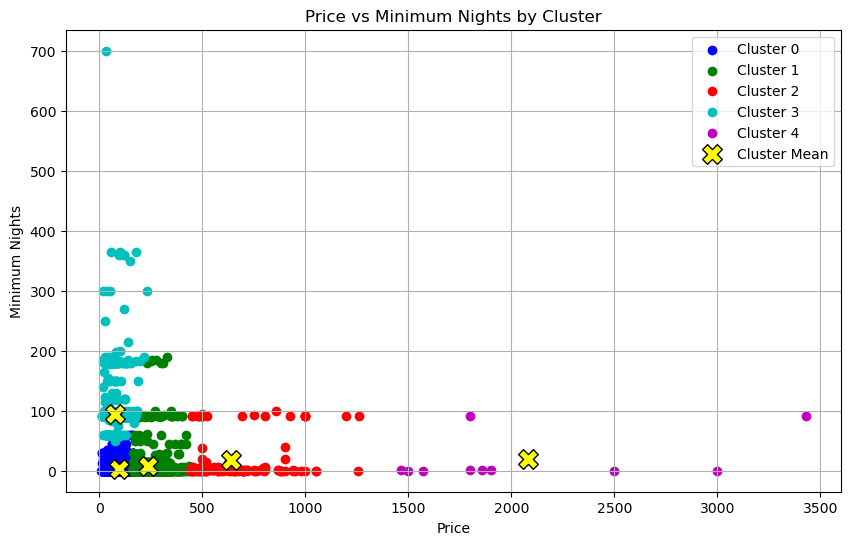

In [24]:
# Calculate the mean values for each cluster
cluster_means = df_num.groupby('clusters').mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # Define colors for each cluster
for cluster in range(5):
    cluster_data = df_num[df_num['clusters'] == cluster]
    plt.scatter(cluster_data['price'], cluster_data['minimum_nights'], c=colors[cluster], label=f'Cluster {cluster}')

# Plot the mean values
plt.scatter(cluster_means['price'], cluster_means['minimum_nights'], s=200, c='yellow', edgecolors='black', marker='X', label='Cluster Mean')

plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.title('Price vs Minimum Nights by Cluster')
plt.legend()
plt.grid(True)

# Save the plot to the specified path
path2 = r'/Users/quincy/Documents/CF_Da/6/Airbnb Berlin/04 Visualization'
plt.savefig(f"{path2}/scatter_plot_with_means.png")

## Comments

Here we can see that cluster 4 is mainly outliers. Super high prices per night, and I an imagine that the 2 properties that have a minimum of 100 nights probably don't have many bookings. Would check that.  

In terms of the rest of the dataset, the clustering makes sense. 

Dark blue (cluster 0) is lower price properties with low number of minimum nights (so shorter stay properties).
Teal is (cluster 3) is lower priced properties with high number of minimum nights (so longer stay properties).
Green (cluster 1) is mid range properties with low number of minimum nights (mostly shorter stay properties).
And finally Red is expensive properties, most of which have a low or medium number of minimum nights.



The means for all of the groups except teal show that most properties are for short term stays, which makes sense.  But it's interesting to note that there is a group of properties that are more exclusively for longer term stays.